# Word Embeddings

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

#input data
texts = [
    'I love cats',
    'I adore dogs',
    'Dogs are the best',
    'Cats and dogs are friends'
]

# Tokenize the input texts 
# convert them into sequences of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Vocabulary size is determined by the number of unique words in the input data
vocabulary_size = len(tokenizer.word_index) + 1

# Padding the sequences to make them of equal length
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

#  embedding dimension
embedding_dim = 50

# Model building
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convert target labels to NumPy array
labels = np.array([1, 1, 0, 0])

# Train the model
model.fit(padded_sequences, labels, epochs=10)


embedding_matrix = model.layers[0].get_weights()[0]

# Print the word embeddings
for word, index in tokenizer.word_index.items():
    print(f"{word}: {embedding_matrix[index]}")


Epoch 1/10
1/1 [==============================] - 0s 288ms/step - loss: 0.7017 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6621 - accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.7500
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6390 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6314 - accuracy: 1.0000
dogs: [ 0.00084899  0.02886885  0.012

# IMDB data - Embedding layer

In [6]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [11]:
from keras.datasets import imdb
from keras import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_5 (Flatten)         (None, 160)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6641 - acc: 0.6345 - val_loss: 0.6095 - val_acc: 0.6972
Epoch 2/10
625/625 [==============================] - 1s 866us/step - loss: 0.5359 - acc: 0.7518 - val_loss: 0.5263 - val_acc: 0.7324
Epoch 3/10
625/625 [============================

# DOWNLOADING THE IMDB DATA AS RAW TEXT

In [14]:
import os
imdb_dir = '/Users/DELL/Desktop/-Deep-Learning-BWF-Shifa-Imran/Task31/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [16]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [18]:
glove_dir = '/Users/DELL/Desktop/-Deep-Learning-BWF-Shifa-Imran/Task31/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf-8')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [19]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [20]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                320032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 95ms/step - loss: 1.7275 - acc: 0.5150 - val_loss: 0.6918 - val_acc: 0.4979
Epoch 2/10
7/7 [==============================] - 0s 77ms/step - loss: 0.6227 - acc: 0.6150 - val_loss: 0.7172 - val_acc: 0.4977
Epoch 3/10
7/7 [==============================] - 0s 69ms/step - loss: 0.5564 - acc: 0.6350 - val_loss: 0.6880 - val_acc: 0.5291
Epoch 4/10
7/7 [==============================] - 0s 68ms/step - loss: 0.5294 - acc: 0.7500 - val_loss: 0.7735 - val_acc: 0.4986
Epoch 5/10
7/7 [==============================] - 0s 72ms/step - loss: 0.5012 - acc: 0.6750 - val_loss: 0.7129 - val_acc: 0.5135
Epoch 6/10
7/7 [==============================] - 0s 69ms/step - loss: 0.4225 - acc: 0.7750 - val_loss: 0.7645 - val_acc: 0.5041
Epoch 7/10
7/7 [==============================] - 0s 70ms/step - loss: 0.3971 - acc: 0.7900 - val_loss: 1.0560 - val_acc: 0.4983
Epoch 8/10
7/7 [==============================] - 0s 73ms/step - loss: 0.3834 - acc: 0.8000 - val

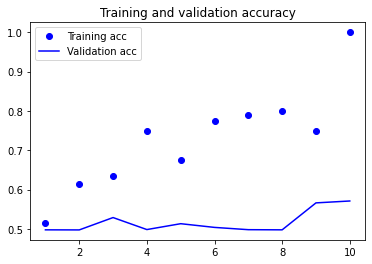

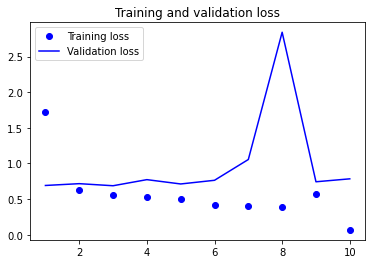

In [22]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()